In [1]:
# imports
import pandas as pd
import re
import os
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [61]:
# function to clean each of the text files and store in cleaned_text_files folder

# folder to input: "health_news_clustering/Health-Tweets"
# contains all the relevant news site tweets as .txt files for each news site

def clean_text(folder):

    # create new folder called health_news_clustering/cleaned_text_files
    path_list = os.path.split(folder)
    cleaned_dir = os.path.join(path_list[0], f"cleaned_text_files")

    # iterate through existing text files and create cleaned files
    folder_dir = os.listdir(folder)

    #cleaned_txt_list = []
    for txt_file in folder_dir:

        print(f'Name of Current Text File: {txt_file}')

        # text files not utf-encoded, so removed from cleaning
        if txt_file == "wsjhealth.txt" or txt_file == "NBChealth.txt" or txt_file == "foxnewshealth.txt" or txt_file == ".ipynb_checkpoints" or txt_file == "KaiserHealthNews.txt" or txt_file == "msnhealthnews.txt":
            continue
            
        cleaned_txt_name = os.path.join(cleaned_dir, f"cleaned_{txt_file}")
        cleaned_txt_file = open(cleaned_txt_name, "w")

        orig_text_file = open(os.path.join(folder, txt_file))
        orig_text = orig_text_file.readlines()
        
        cleaned_list = []
        for ind, text in enumerate(orig_text):
            link_removed = re.sub(r'http://\S+', '', text)
            text_list = re.split(r'[|]', link_removed)
            #print(text_list)
            try:
                text_list_sentence = text_list[2]
                #print(text_list_sentence)
                cleaned_list.append(text_list_sentence)
            except:
                print("Invalid Index")
                

        cleaned_txt_file.writelines(cleaned_list)

In [33]:
clean_text("health_news_clustering/Health-Tweets")

Name of Current Text File: cbchealth.txt
Name of Current Text File: wsjhealth.txt
Name of Current Text File: nprhealth.txt
Name of Current Text File: goodhealth.txt
Invalid Index
Name of Current Text File: NBChealth.txt
Name of Current Text File: cnnhealth.txt
Name of Current Text File: foxnewshealth.txt
Name of Current Text File: everydayhealth.txt
Name of Current Text File: gdnhealthcare.txt
Name of Current Text File: nytimeshealth.txt
Name of Current Text File: bbchealth.txt
Name of Current Text File: .ipynb_checkpoints
Name of Current Text File: KaiserHealthNews.txt
Name of Current Text File: usnewshealth.txt
Name of Current Text File: latimeshealth.txt
Name of Current Text File: reuters_health.txt
Name of Current Text File: msnhealthnews.txt


In [43]:
# reading number of lines in each of the files
# create new folder called health_news_clustering/cleaned_text_files

folder = "health_news_clustering/cleaned_text_files"
path_list = os.path.split(folder)

# iterate through existing cleaned text files and create cleaned files
folder_dir = os.listdir(folder)

for txt_file in folder_dir:

    if txt_file == ".ipynb_checkpoints":
        continue

    print(f'Name of Current Text File: {txt_file}')
    
    cleaned_txt_name = os.path.join(folder, txt_file)
    cleaned_txt_file = open(cleaned_txt_name)

    lines = cleaned_txt_file.readlines()
    print(len(lines))

Name of Current Text File: cleaned_cbchealth.txt
3728
Name of Current Text File: cleaned_bbchealth.txt
3929
Name of Current Text File: cleaned_usnewshealth.txt
1400
Name of Current Text File: cleaned_everydayhealth.txt
3239
Name of Current Text File: cleaned_cnnhealth.txt
4049
Name of Current Text File: cleaned_goodhealth.txt
7795
Name of Current Text File: cleaned_latimeshealth.txt
4171
Name of Current Text File: cleaned_nprhealth.txt
4837
Name of Current Text File: cleaned_nytimeshealth.txt
6144
Name of Current Text File: cleaned_gdnhealthcare.txt
2979
Name of Current Text File: cleaned_reuters_health.txt
4719


In [3]:
# let's start with cleaned_gdnhealthcare.txt because it has the least text
gdn_fname = "health_news_clustering/cleaned_text_files/cleaned_gdnhealthcare.txt"
gdn = open(gdn_fname)
gdn_lines = gdn.readlines()
print(gdn_lines[:10])

['Are you a member of the network? Sign up here for free: https://register.theguardian.com/healthcare-professionals/ #NHS #healthcare\n', 'What is palliative care like in India? One GP trainee explains all: \n', 'Most viewed this week: I loved being a midwife but bullying, stress and fear made me resign  #ViewsfromtheNHSfrontline\n', 'How can technology improve mental health waiting times?  #mentalhealth #NHS\n', 'In case you missed it: Why the #NHS shouldn’t hog the limelight this #generalelection \n', '"India is a stark example of how commodifying healthcare can lead to corruption" \n', "Popular on the network now: I've seen first-hand how palliative care in India is compromised by privatisation \n", "Are there any topics you think we should be covering? Or anyone you'd like to see write for us?\n", 'Lots of debate going on under this piece saying the #NHS should not be the focus this #generalelection. Join in here: \n', 'Our weekly newsletter is about to go out. Sign up to get it fr

In [97]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.5, min_df = 5)
X = vectorizer.fit_transform(gdn_lines)
vectorizer.get_feature_names_out()

array(['000', '10', '12', ..., 'yesterday', 'young', 'zealand'],
      dtype=object)

In [100]:
X.shape

(2979, 1093)

In [101]:
# sparsity of tf-idf matrix
X.nnz/np.prod(X.shape)

np.float64(0.006899163310603317)

In [118]:
# k means clustering
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
print(centers)

[[0.003868   0.         0.         ... 0.00326568 0.         0.        ]
 [0.         0.         0.         ... 0.00600934 0.         0.        ]
 [0.         0.         0.         ... 0.0045832  0.         0.        ]
 ...
 [0.         0.         0.00347887 ... 0.         0.         0.        ]
 [0.00048002 0.00520767 0.00146194 ... 0.01499569 0.00099364 0.0057028 ]
 [0.00070612 0.00327245 0.00391725 ... 0.00063408 0.00086443 0.0008581 ]]


In [138]:
print(clusters[:10])
print(kmeans.labels_[:10])

[4 7 2 3 8 8 8 7 8 4]
[4 7 2 3 8 8 8 7 8 4]


In [142]:
silhouette_avg = silhouette_score(X, clusters)
print("for n clusters = ", 10, "avg silhouette is", silhouette_avg)

for n clusters =  10 avg silhouette is 0.025180707542661263


In [156]:
kmeans = KMeans(n_clusters=1000, random_state=0)
clusters = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, clusters)
print("for n clusters = ", 1000, "avg silhouette is", silhouette_avg)

for n clusters =  1000 avg silhouette is 0.19758316611751353


In [96]:
#for i in clusters:
#    print(X[i])
# Adding labels to the plot
for i, txt in enumerate(gdn_lines[:10]):
    print(txt, X[i][0])

Are you a member of the network? Sign up here for free: https://register.theguardian.com/healthcare-professionals/ #NHS #healthcare
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11 stored elements and shape (1, 4959)>
  Coords	Values
  (0, 2843)	0.346105559424576
  (0, 3024)	0.2970954457710862
  (0, 4089)	0.341369722701042
  (0, 1832)	0.2858992272308529
  (0, 2205)	0.2843645099065264
  (0, 3720)	0.2958915051303483
  (0, 4490)	0.2753573994031732
  (0, 930)	0.27316829136629317
  (0, 2080)	0.4243618232586356
  (0, 3528)	0.28139270705932706
  (0, 3036)	0.1247044481443433
What is palliative care like in India? One GP trainee explains all: 
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 4959)>
  Coords	Values
  (0, 3232)	0.454937878063333
  (0, 755)	0.21912806500829737
  (0, 2631)	0.26852126865549164
  (0, 2290)	0.46487993724406196
  (0, 1964)	0.2946720329923688
  (0, 4587)	0.4910307015809391
  (0, 1668)	0.3589632760236464
Most

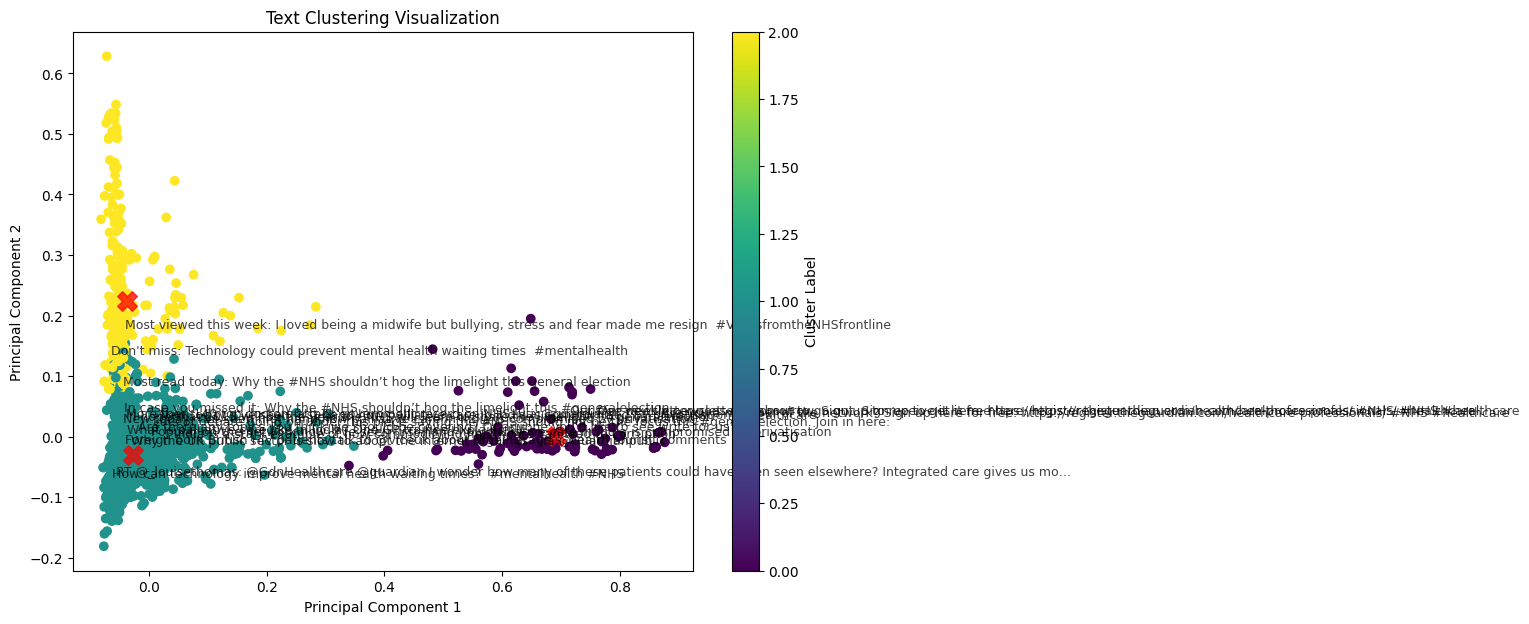

In [66]:
# Step 3: Text Preprocessing and Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(gdn_lines)

# Step 4: Dimensionality Reduction (optional, for visualization)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Step 5: Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# Step 6: Visualization
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title("Text Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding cluster centers to the plot
centers = kmeans.cluster_centers_
centers_reduced = pca.transform(centers)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='red', s=200, alpha=0.75, marker='X')

# Adding labels to the plot
for i, txt in enumerate(gdn_lines[:20]):
    plt.annotate(txt, (X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, alpha=0.75)

plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [2]:
# let's start with cleaned_gdnhealthcare.txt because it has the least text
gdn_fname = "health_news_clustering/cleaned_text_files/cleaned_gdnhealthcare.txt"
gdn = open(gdn_fname)
gdn_lines = gdn.readlines()
print(gdn_lines[:10])

['Are you a member of the network? Sign up here for free: https://register.theguardian.com/healthcare-professionals/ #NHS #healthcare\n', 'What is palliative care like in India? One GP trainee explains all: \n', 'Most viewed this week: I loved being a midwife but bullying, stress and fear made me resign  #ViewsfromtheNHSfrontline\n', 'How can technology improve mental health waiting times?  #mentalhealth #NHS\n', 'In case you missed it: Why the #NHS shouldn’t hog the limelight this #generalelection \n', '"India is a stark example of how commodifying healthcare can lead to corruption" \n', "Popular on the network now: I've seen first-hand how palliative care in India is compromised by privatisation \n", "Are there any topics you think we should be covering? Or anyone you'd like to see write for us?\n", 'Lots of debate going on under this piece saying the #NHS should not be the focus this #generalelection. Join in here: \n', 'Our weekly newsletter is about to go out. Sign up to get it fr

In [3]:
# let's try LDA for topic modeling!
gdn_col = {'gdn': gdn_lines}
df = pd.DataFrame(gdn_col)
gdn_lines[:10]
df

,gdn
0,Are you a member of the network? Sign up here ...
1,What is palliative care like in India? One GP ...
2,Most viewed this week: I loved being a midwife...
3,How can technology improve mental health waiti...
4,In case you missed it: Why the #NHS shouldn’t ...
...,...
2974,Read how a GP practice in Manchester uses Skyp...
2975,Why did NHS staff go on strike on Monday? #NH...
2976,Staff are angry over government contempt on pa...
2977,Can Lord Darzi’s plan improve Londoners’ healt...


In [4]:
# pre-processing using regex
def text_prep(text):
    text = re.sub('\s+', ' ', text)  # Remove extra spaces
    text = re.sub('\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub('\'', '', text)  # Remove apostrophes
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

df['cleaned_gdn'] = df['gdn'].apply(text_prep)
df

,gdn,cleaned_gdn
0,Are you a member of the network? Sign up here ...,are you a member of the network sign up here ...
1,What is palliative care like in India? One GP ...,what is palliative care like in india one gp ...
2,Most viewed this week: I loved being a midwife...,most viewed this week i loved being a midwife...
3,How can technology improve mental health waiti...,how can technology improve mental health waiti...
4,In case you missed it: Why the #NHS shouldn’t ...,in case you missed it why the nhs shouldn t ...
...,...,...
2974,Read how a GP practice in Manchester uses Skyp...,read how a gp practice in manchester uses skyp...
2975,Why did NHS staff go on strike on Monday? #NH...,why did nhs staff go on strike on monday nhs...
2976,Staff are angry over government contempt on pa...,staff are angry over government contempt on pa...
2977,Can Lord Darzi’s plan improve Londoners’ healt...,can lord darzi s plan improve londoners healt...


In [5]:
import nltk
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = stopwords.words('english')

# using gensim word tokenizer
def tokenize(text):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

df['gdn_tokens'] = df['cleaned_gdn'].apply(tokenize)
df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oishanibandopadhyay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/oishanibandopadhyay/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,gdn,cleaned_gdn,gdn_tokens
0,Are you a member of the network? Sign up here ...,are you a member of the network sign up here ...,"[member, network, sign, free, https, register,..."
1,What is palliative care like in India? One GP ...,what is palliative care like in india one gp ...,"[palliative, care, like, india, one, gp, train..."
2,Most viewed this week: I loved being a midwife...,most viewed this week i loved being a midwife...,"[viewed, week, loved, midwife, bullying, stres..."
3,How can technology improve mental health waiti...,how can technology improve mental health waiti...,"[technology, improve, mental, health, waiting,..."
4,In case you missed it: Why the #NHS shouldn’t ...,in case you missed it why the nhs shouldn t ...,"[case, missed, nhs, hog, limelight, generalele..."
...,...,...,...
2974,Read how a GP practice in Manchester uses Skyp...,read how a gp practice in manchester uses skyp...,"[read, gp, practice, manchester, uses, skype, ..."
2975,Why did NHS staff go on strike on Monday? #NH...,why did nhs staff go on strike on monday nhs...,"[nhs, staff, go, strike, monday, nhsstrike]"
2976,Staff are angry over government contempt on pa...,staff are angry over government contempt on pa...,"[staff, angry, government, contempt, pay, nhss..."
2977,Can Lord Darzi’s plan improve Londoners’ healt...,can lord darzi s plan improve londoners healt...,"[lord, darzi, plan, improve, londoners, health..."


In [6]:
import spacy

# spacy for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

df['gdn_lemmas'] = df['gdn_tokens'].apply(lemmatize)
df

,gdn,cleaned_gdn,gdn_tokens,gdn_lemmas
0,Are you a member of the network? Sign up here ...,are you a member of the network sign up here ...,"[member, network, sign, free, https, register,...","[member, network, sign, free, https, register,..."
1,What is palliative care like in India? One GP ...,what is palliative care like in india one gp ...,"[palliative, care, like, india, one, gp, train...","[palliative, care, like, india, one, gp, train..."
2,Most viewed this week: I loved being a midwife...,most viewed this week i loved being a midwife...,"[viewed, week, loved, midwife, bullying, stres...","[view, week, love, midwife, bully, stress, fea..."
3,How can technology improve mental health waiti...,how can technology improve mental health waiti...,"[technology, improve, mental, health, waiting,...","[technology, improve, mental, health, waiting,..."
4,In case you missed it: Why the #NHS shouldn’t ...,in case you missed it why the nhs shouldn t ...,"[case, missed, nhs, hog, limelight, generalele...","[case, miss, nhs, hog, limelight, generalelect..."
...,...,...,...,...
2974,Read how a GP practice in Manchester uses Skyp...,read how a gp practice in manchester uses skyp...,"[read, gp, practice, manchester, uses, skype, ...","[read, gp, practice, manchester, use, skype, e..."
2975,Why did NHS staff go on strike on Monday? #NH...,why did nhs staff go on strike on monday nhs...,"[nhs, staff, go, strike, monday, nhsstrike]","[nhs, staff, go, strike, monday, nhsstrike]"
2976,Staff are angry over government contempt on pa...,staff are angry over government contempt on pa...,"[staff, angry, government, contempt, pay, nhss...","[staff, angry, government, contempt, pay, nhss..."
2977,Can Lord Darzi’s plan improve Londoners’ healt...,can lord darzi s plan improve londoners healt...,"[lord, darzi, plan, improve, londoners, health...","[lord, darzi, plan, improve, londoner, health,..."


In [7]:
# creation of dictionary and corpus
id2word = gensim.corpora.Dictionary(df['gdn_lemmas'])
texts = df['gdn_lemmas']
corpus = [id2word.doc2bow(text) for text in texts]
corpus[:5]

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1)],
 [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)],
 [(19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(6, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(6, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)]]

In [60]:
# build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=13, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [61]:
# Print the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.086*"read" + 0.074*"life" + 0.049*"find" + 0.048*"crisis" + 0.047*"article" + 0.035*"cancer" + 0.033*"event" + 0.025*"talk" + 0.024*"policy" + 0.023*"general"')
(1, '0.169*"healthcare" + 0.054*"professional" + 0.051*"free" + 0.047*"https" + 0.046*"com" + 0.044*"theguardian" + 0.041*"good" + 0.041*"register" + 0.036*"join" + 0.033*"network"')
(2, '0.101*"mentalhealth" + 0.074*"uk" + 0.061*"could" + 0.056*"high" + 0.044*"let" + 0.038*"blogpost" + 0.038*"think" + 0.037*"technology" + 0.030*"low" + 0.024*"speak"')
(3, '0.128*"do" + 0.126*"not" + 0.093*"miss" + 0.062*"gp" + 0.039*"learn" + 0.037*"give" + 0.033*"blog" + 0.027*"face" + 0.024*"difficult" + 0.020*"comment"')
(4, '0.090*"hospital" + 0.075*"year" + 0.051*"want" + 0.051*"well" + 0.044*"staff" + 0.036*"black" + 0.033*"use" + 0.032*"know" + 0.026*"ebola" + 0.025*"among"')
(5, '0.330*"nhs" + 0.082*"patient" + 0.074*"new" + 0.049*"today" + 0.038*"work" + 0.033*"get" + 0.030*"system" + 0.025*"day" + 0.022*"never" + 0.021*"popula

In [62]:
from gensim.models import CoherenceModel

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['gdn_lemmas'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4958297784050754


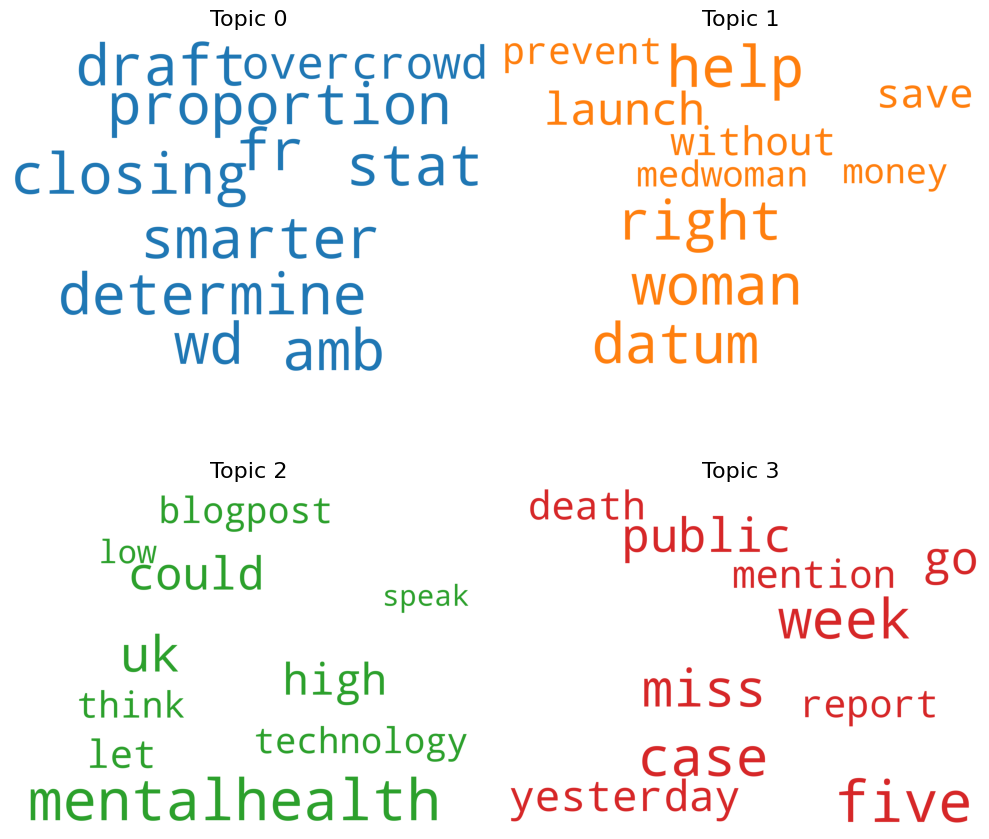

In [63]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [64]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.345450  0.008656       1        1  17.095065
12     0.156036  0.105410       2        1  13.989842
8      0.056091 -0.269354       3        1  13.182144
1      0.126682 -0.085436       4        1   9.946394
7     -0.076867 -0.047874       5        1   7.751357
4     -0.050232 -0.070176       6        1   7.711592
11    -0.069955 -0.050552       7        1   7.106256
3     -0.055379  0.220648       8        1   6.138291
0     -0.106849 -0.018651       9        1   5.514307
6      0.014793  0.229778      10        1   5.118454
2     -0.115654 -0.010100      11        1   3.294010
9     -0.114542 -0.011664      12        1   3.070008
10    -0.109575 -0.000685      13        1   0.082280, topic_info=           Term         Freq        Total Category  logprob  loglift
6           nhs  1623.000000  1623.000000  Default  30.0000  30.0000
114          rt   669.000000   669.000000  Default  29.0000  29.0000
2    healthcare   475.000000   475.000000  Default  28.0000  28.0000
28       health   434.000000   434.000000  Default  27.0000  27.0000
97      patient   398.000000   398.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
25       stress     0.006953    15.410192  Topic13  -8.1161  -0.6007
26         view     0.006953   150.214132  Topic13  -8.1161  -2.8778
27         week     0.006953   127.418524  Topic13  -8.1161  -2.7132
28       health     0.006953   434.239667  Topic13  -8.1161  -3.9393
29      improve     0.006953   107.576711  Topic13  -8.1161  -2.5439

[462 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
45        7  0.968975          I
299       5  0.947542     access
969       1  0.962424         ad
371       7  0.966879      agree
1581      9  0.980959    alcohol
...     ...       ...        ...
89        6  0.992680       year
380      10  0.989857  yesterday
154      11  0.974377        yet
1557      3  0.992777        yfv
3264      1  0.988206    zealand

[382 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 13, 9, 2, 8, 5, 12, 4, 1, 7, 3, 10, 11])